<a href="https://colab.research.google.com/github/Diacod-I/TSF-GRIP-May-2023/blob/main/Task%231/TSF_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing dataset

In [2]:
!wget https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

--2023-05-13 10:39:01--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: ‘student_scores - student_scores.csv’

student_scores - st 100%[===================>]     212  --.-KB/s    in 0s      

2023-05-13 10:39:01 (8.26 MB/s) - ‘student_scores - student_scores.csv’ saved [212/212]



In [4]:
studentdata = pd.read_csv("/content/student_scores - student_scores.csv")

## Importing Modules

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import math
import warnings
warnings.filterwarnings("ignore")

In [76]:
studentdata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
studentdata.count()

Hours     25
Scores    25
dtype: int64

In [99]:
studentdata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory Data Analysis

In [6]:
plt.style.use("dark_background")

Scatter plot of the data

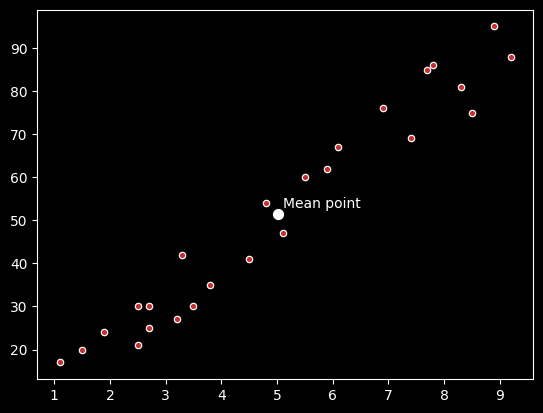

In [104]:
plt.scatter(studentdata.Hours,studentdata.Scores,c='white',s=20)
plt.scatter(studentdata.Hours,studentdata.Scores,c='tab:red',s=7)
plt.scatter(5.012,51.48,c="white",s=50)
plt.text(5.1,53,"Mean point")
plt.show()

Distribution of values

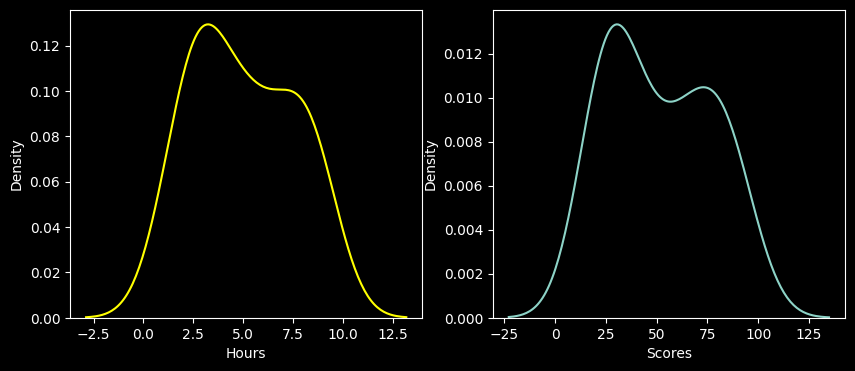

In [98]:
plt.subplots(1,2,figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(studentdata.Hours,c="yellow")
plt.subplot(1,2,2)
sns.kdeplot(studentdata.Scores)
plt.show()

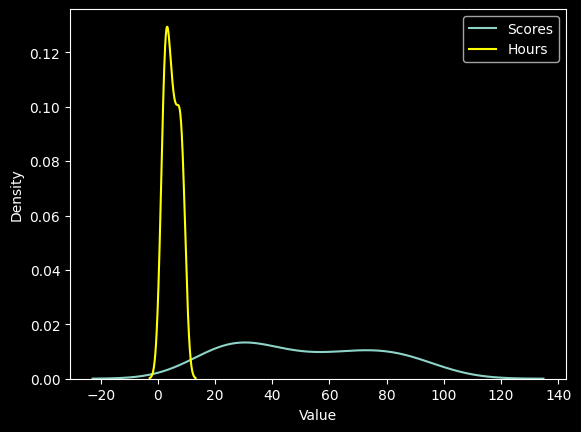

In [68]:
sns.kdeplot(studentdata.Scores,label="Scores")
sns.kdeplot(studentdata.Hours,label="Hours",c="yellow")
plt.xlabel("Value")
plt.legend()
plt.show()

Noisy trend of data and Running Average

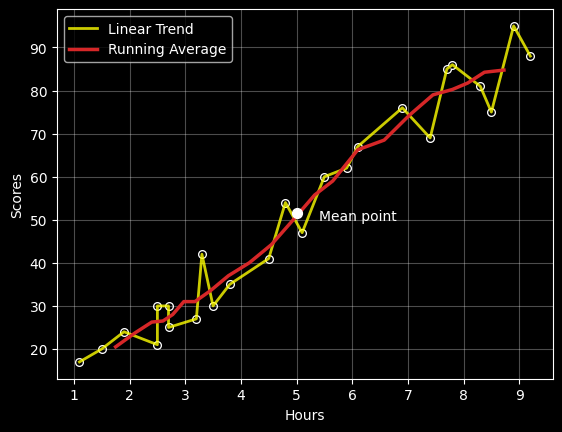

In [144]:
runx = [np.mean((sorted(studentdata.Hours))[ind:ind+4]) for ind in range(len(studentdata.Hours)-4+1)]
runy = [np.mean((studentdata.Scores[np.argsort(np.array(studentdata.Hours))])[ind:ind+4]) for ind in range(len(studentdata.Hours)-4+1)]
plt.plot(sorted(np.array(studentdata.Hours)),studentdata.Scores[np.argsort(np.array(studentdata.Hours))],color="yellow",linewidth=2,label="Linear Trend",alpha=0.8)
plt.plot(runx,runy,color="tab:red",linewidth=2.5,label="Running Average")
plt.scatter(studentdata.Hours,studentdata.Scores,c='white',s=30)
plt.scatter(studentdata.Hours,studentdata.Scores,c='black',s=13)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(5.012,51.48,c="white",s=50,zorder=5)
plt.text(5.4,50,"Mean point")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Linear Regression Model

In [158]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(studentdata[['Hours']],studentdata.Scores,test_size=0.2)

In [159]:
linmodel = LinearRegression()
linmodel.fit(Xtrain,Ytrain)

LinearRegression()

In [245]:
Ypred = linmodel.predict(Xtest)
print(Ypred)

[76.08482591 29.76979819 37.18020263 87.20043256 59.41141593]


As for the question asked in Task #1 description, the following shows the predicted value of score for 9.25 hours/day.

In [217]:
print("Estimation of score in exam upon studying for 9.25 hours/day = %.4f" % linmodel.predict([[9.25]])[0])

Estimation of score in exam upon studying for 9.25 hours/day = 90.4425


Therefore, the student can expect a score of around 90.4 percentage in thier exams if they study 9.25 hours a day

## Model evaluation

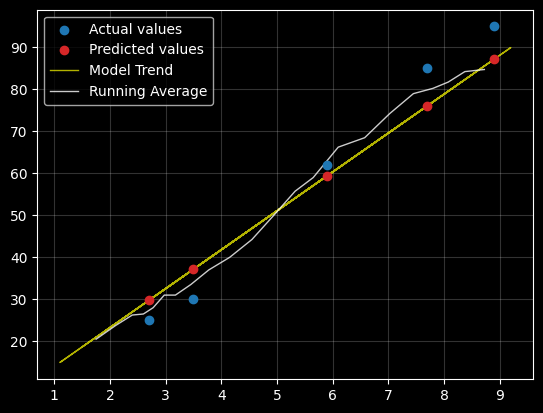

In [239]:
Ypred = linmodel.predict(Xtest)
line = linmodel.coef_*studentdata.Hours + linmodel.intercept_
plt.scatter(Xtest,Ytest,label="Actual values",c="tab:blue",zorder=4)
plt.scatter(Xtest,Ypred,label="Predicted values",c="tab:red",zorder=5)
plt.plot(studentdata.Hours,line,linewidth=1,c="yellow",alpha=0.7,label="Model Trend")
plt.plot(runx,runy,color="white",linewidth=1,label="Running Average",alpha=0.8)
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [216]:
print("R-squared Error = %.4f"%(100*linmodel.score(Xtest,Ytest)))

R-squared Error = 94.4353


In [219]:
print("Mean Squared Error = %.4f" % mean_squared_error(Ytest,Ypred),"\n")
print("Root Mean Squared Error = %.4f" % math.sqrt(mean_squared_error(Ytest,Ypred)),"\n")
print("Mean Absolute Error = %.4f" % mean_absolute_error(Ytest,Ypred),"\n")
print("Mean Absolute Percentage Error = %.4f" % mean_absolute_percentage_error(Ytest,Ypred),"\n")

Mean Squared Error = 44.2641 

Root Mean Squared Error = 6.6531 

Mean Absolute Error = 6.2507 

Mean Absolute Percentage Error = 0.1318 

